In [1]:
import torch

In [2]:
pip install bnlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install pgmpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import bnlearn as bn
import numpy as np
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator

In [5]:
from google.colab import files
import io

uploaded = files.upload()

Saving CovidData.csv to CovidData.csv


In [6]:
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['CovidData.csv']), lineterminator='\n')
df  

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU\r
0,2,1,1,1,3/5/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,3/6/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,9/6/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/6/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [8]:
print(df.columns)

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU\r'],
      dtype='object')


In [9]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU\r                   0
dtype: int64

In [10]:
for col in df.columns:
 print("{}".format(col), df[col].unique(), '\n')

USMER [2 1] 

MEDICAL_UNIT [ 1  2  3  4  5  6  7  8  9 10 11 12 13] 

SEX [1 2] 

PATIENT_TYPE [1 2] 

DATE_DIED ['3/5/2020' '3/6/2020' '9/6/2020' '12/6/2020' '21/06/2020' '9999-99-99'
 '26/02/2020' '5/4/2020' '8/5/2020' '20/05/2020' '17/07/2020' '13/01/2020'
 '22/01/2020' '29/01/2020' '13/02/2020' '18/02/2020' '19/02/2020'
 '20/02/2020' '24/02/2020' '4/3/2020' '7/3/2020' '12/3/2020' '14/03/2020'
 '18/03/2020' '27/03/2020' '28/03/2020' '29/03/2020' '2/4/2020' '6/4/2020'
 '7/4/2020' '8/4/2020' '9/4/2020' '10/4/2020' '11/4/2020' '12/4/2020'
 '13/04/2020' '14/04/2020' '15/04/2020' '16/04/2020' '17/04/2020'
 '18/04/2020' '20/04/2020' '21/04/2020' '22/04/2020' '23/04/2020'
 '24/04/2020' '25/04/2020' '26/04/2020' '27/04/2020' '28/04/2020'
 '29/04/2020' '30/04/2020' '1/5/2020' '2/5/2020' '4/5/2020' '5/5/2020'
 '6/5/2020' '7/5/2020' '9/5/2020' '10/5/2020' '11/5/2020' '12/5/2020'
 '13/05/2020' '14/05/2020' '15/05/2020' '16/05/2020' '17/05/2020'
 '18/05/2020' '19/05/2020' '21/05/2020' '22/05/202

In [11]:
df.duplicated().sum()

812049

In [12]:
df_new = df.drop_duplicates()
df_new

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU\r
0,2,1,1,1,3/5/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,3/6/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,9/6/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/6/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,1,13,2,1,9999-99-99,97,2,47,97,1,...,2,2,2,2,2,2,2,2,7,97
1048569,1,13,1,2,9999-99-99,2,2,56,2,1,...,2,2,2,2,2,2,2,2,7,2
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97


In [13]:
df_new.reset_index(drop=True, inplace=True)
df_new

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU\r
0,2,1,1,1,3/5/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,3/6/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,9/6/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/6/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236521,1,13,2,1,9999-99-99,97,2,47,97,1,...,2,2,2,2,2,2,2,2,7,97
236522,1,13,1,2,9999-99-99,2,2,56,2,1,...,2,2,2,2,2,2,2,2,7,2
236523,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
236524,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97


In [14]:
df_new.loc[(df_new['SEX'] == 2), 'PREGNANT'] = 2
df_new.loc[(df_new['SEX'] == 1) & (df_new['PREGNANT'] == 1) & (
        (df_new['AGE'] >= 40) | (df_new['AGE'] <= 11)), 'PREGNANT'] = 2
print(df_new.shape)

(236526, 21)


In [15]:
#Remove missing rows from the columns that has less missing values
remove_list = ['PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE',
                    'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']

for i in remove_list:
    print('Deleting ', i)
    df_new[i] = df_new[i].replace([99, 98], 98)
    df_new = df_new.drop(df_new[df_new[i] == 98].index)
    print(df_new.shape)

Deleting  PNEUMONIA
(229339, 21)
Deleting  DIABETES
(226516, 21)
Deleting  COPD
(226153, 21)
Deleting  ASTHMA
(225973, 21)
Deleting  INMSUPR
(225470, 21)
Deleting  HIPERTENSION
(225254, 21)
Deleting  OTHER_DISEASE
(223658, 21)
Deleting  CARDIOVASCULAR
(223525, 21)
Deleting  OBESITY
(223149, 21)
Deleting  RENAL_CHRONIC
(223010, 21)
Deleting  TOBACCO
(222655, 21)


In [16]:
df_new['CLASIFFICATION_FINAL'] = df_new['CLASIFFICATION_FINAL'].apply(lambda x: 1 if x <= 3 else 0 )

In [17]:
df_new['DIED'] = [0 if i == '9999-99-99' else 1 for i in df_new['DATE_DIED']]
df_new = df_new.drop(columns='DATE_DIED')
print(df_new.shape)

(222655, 21)


In [18]:
df_new.head(5)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU\r,DIED
0,2,1,1,1,97,1,65,2,2,2,...,2,1,2,2,2,2,2,1,97,1
1,2,1,2,1,97,1,72,2,2,2,...,2,1,2,2,1,1,2,0,97,1
2,2,1,2,2,1,2,55,2,1,2,...,2,2,2,2,2,2,2,1,2,1
3,2,1,1,1,97,2,53,2,2,2,...,2,2,2,2,2,2,2,0,97,1
4,2,1,2,1,97,2,68,2,1,2,...,2,1,2,2,2,2,2,1,97,1


In [19]:
df_new = df_new.drop(columns=['ICU\r'])

In [20]:
df_new['INTUBED'].value_counts()

2     96566
97    92390
1     31675
99     2024
Name: INTUBED, dtype: int64

In [21]:
#Replace the value 2 with 0
non_zero_list = ['USMER', 'SEX', 'PATIENT_TYPE', 'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD',
                         'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
                         'RENAL_CHRONIC', 'TOBACCO']
for each in non_zero_list:
    df_new[each] = df_new[each].replace(2, 0)

In [22]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222655 entries, 0 to 236525
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   USMER                 222655 non-null  int64
 1   MEDICAL_UNIT          222655 non-null  int64
 2   SEX                   222655 non-null  int64
 3   PATIENT_TYPE          222655 non-null  int64
 4   INTUBED               222655 non-null  int64
 5   PNEUMONIA             222655 non-null  int64
 6   AGE                   222655 non-null  int64
 7   PREGNANT              222655 non-null  int64
 8   DIABETES              222655 non-null  int64
 9   COPD                  222655 non-null  int64
 10  ASTHMA                222655 non-null  int64
 11  INMSUPR               222655 non-null  int64
 12  HIPERTENSION          222655 non-null  int64
 13  OTHER_DISEASE         222655 non-null  int64
 14  CARDIOVASCULAR        222655 non-null  int64
 15  OBESITY               222655 non-n

In [23]:
for col in df_new.columns:
 print("{}".format(col), df_new[col].unique(), '\n')

USMER [0 1] 

MEDICAL_UNIT [ 1  2  3  4  5  6  7  8  9 10 11 12 13] 

SEX [1 0] 

PATIENT_TYPE [1 0] 

INTUBED [97  1  2 99] 

PNEUMONIA [1 0] 

AGE [ 65  72  55  53  68  40  64  37  25  38  24  30  48  23  80  61  54  59
  45  26  32  49  39  27  57  20  56  47  50  46  43  28  33  16  62  58
  36  44  66  52  51  35  19  90  34  22  29  14  31  42  15   0  17  41
   2  10   1  12   4   7   6   8  60   5  13  63  75  81  67  18  70  88
  85  92  73  74  78  76  82  77  86  71  95  87  83  84  79  69  89   3
  97  93 100  91  21 103  11   9  94  96 101 107 102  98  99 109 116 105
 111 104 114 120 106 110 118 117 121 108 115 119 113] 

PREGNANT [ 0 98  1] 

DIABETES [0 1] 

COPD [0 1] 

ASTHMA [0 1] 

INMSUPR [0 1] 

HIPERTENSION [1 0] 

OTHER_DISEASE [0 1] 

CARDIOVASCULAR [0 1] 

OBESITY [0 1] 

RENAL_CHRONIC [0 1] 

TOBACCO [0 1] 

CLASIFFICATION_FINAL [1 0] 

DIED [1 0] 



In [24]:
data_1 = df_new.drop(columns=['INTUBED'], axis = 1)

In [25]:
data_1["AGE"] = pd.cut(data_1["AGE"], bins = [0, 10, 35, 65, 125], labels = [0, 1, 2, 3])

In [26]:
data_1['AGE'].value_counts()

2    120139
3     61146
1     35952
0      4415
Name: AGE, dtype: int64

In [27]:
data_1

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DIED
0,0,1,1,1,1,2,0,0,0,0,0,1,0,0,0,0,0,1,1
1,0,1,0,1,1,3,0,0,0,0,0,1,0,0,1,1,0,0,1
2,0,1,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,1,1
3,0,1,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,1,0,3,0,1,0,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236521,1,13,0,1,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0
236522,1,13,1,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0
236523,1,13,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0
236524,0,13,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
data_1.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'PNEUMONIA', 'AGE',
       'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL', 'DIED'],
      dtype='object')

In [29]:
list_hosp = ['AGE', 'INMSUPR', 'PATIENT_TYPE', 'DIABETES', 'CARDIOVASCULAR', 'CLASIFFICATION_FINAL']
for col in data_1.columns:  
  if col not in list_hosp:
    data_1 = data_1.drop(columns = col)
  else:
    print('{} added to the DataFrame'.format(col))

PATIENT_TYPE added to the DataFrame
AGE added to the DataFrame
DIABETES added to the DataFrame
INMSUPR added to the DataFrame
CARDIOVASCULAR added to the DataFrame
CLASIFFICATION_FINAL added to the DataFrame


In [30]:
data_1

,PATIENT_TYPE,AGE,DIABETES,INMSUPR,CARDIOVASCULAR,CLASIFFICATION_FINAL
0,1,2,0,0,0,1
1,1,3,0,0,0,0
2,0,2,1,0,0,1
3,1,2,0,0,0,0
4,1,3,1,0,0,1
...,...,...,...,...,...,...
236521,1,2,1,0,0,0
236522,0,2,1,0,0,0
236523,0,2,0,0,0,0
236524,1,2,0,0,0,0


In [31]:
data_1.columns

Index(['PATIENT_TYPE', 'AGE', 'DIABETES', 'INMSUPR', 'CARDIOVASCULAR',
       'CLASIFFICATION_FINAL'],
      dtype='object')

In [32]:
for col in data_1.columns:
 print("{}".format(col), data_1[col].unique(), '\n')

PATIENT_TYPE [1 0] 

AGE [2, 3, 1, NaN, 0]
Categories (4, int64): [0 < 1 < 2 < 3] 

DIABETES [0 1] 

INMSUPR [0 1] 

CARDIOVASCULAR [0 1] 

CLASIFFICATION_FINAL [1 0] 



In [33]:
data_1['AGE'].value_counts()

2    120139
3     61146
1     35952
0      4415
Name: AGE, dtype: int64

In [43]:
model_hc_k2 = bn.structure_learning.fit(data_1)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).


In [45]:
model_hc_k2   = bn.structure_learning.fit(data_1, methodtype='hc', scoretype='k2')
model_hc_bdeu = bn.structure_learning.fit(data_1, methodtype='hc', scoretype='bdeu')

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


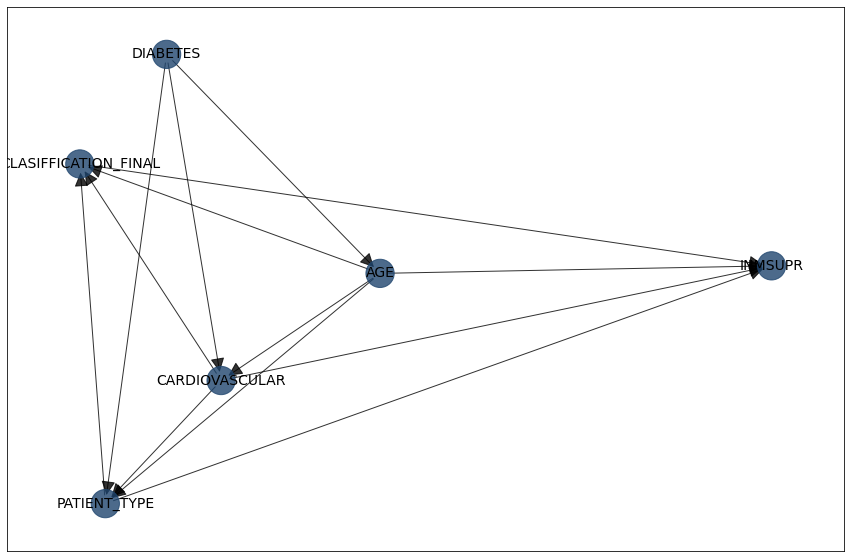

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


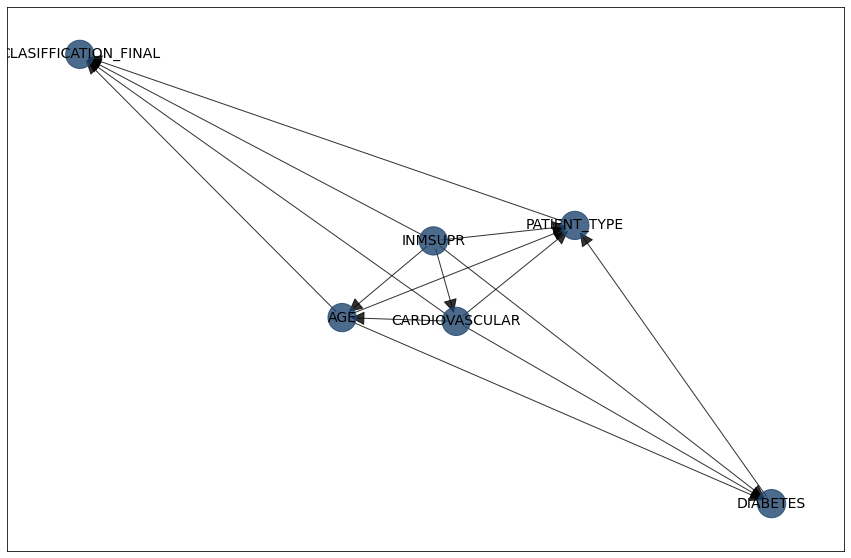

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


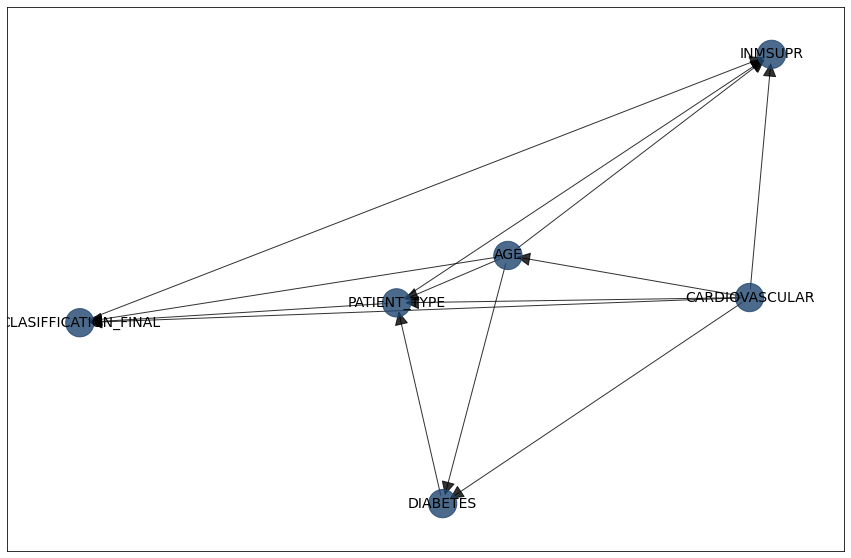

{'fig': <Figure size 1080x720 with 1 Axes>,
 'ax': <Figure size 1080x720 with 1 Axes>,
 'pos': {'PATIENT_TYPE': array([-0.08326492, -0.05710409]),
  'AGE': array([0.01455211, 0.14452132]),
  'DIABETES': array([-0.04277598, -0.91127743]),
  'INMSUPR': array([0.24617277, 1.        ]),
  'CARDIOVASCULAR': array([ 0.22682305, -0.0344971 ]),
  'CLASIFFICATION_FINAL': array([-0.36150703, -0.1416427 ])},
 'G': <networkx.classes.digraph.DiGraph at 0x7f3efc2a73d0>,
 'node_properties': {'PATIENT_TYPE': {'node_color': '#1f456e',
   'node_size': 800},
  'AGE': {'node_color': '#1f456e', 'node_size': 800},
  'DIABETES': {'node_color': '#1f456e', 'node_size': 800},
  'INMSUPR': {'node_color': '#1f456e', 'node_size': 800},
  'CARDIOVASCULAR': {'node_color': '#1f456e', 'node_size': 800},
  'CLASIFFICATION_FINAL': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('PATIENT_TYPE', 'INMSUPR'): {'color': '#000000',
   'weight': 1},
  ('PATIENT_TYPE', 'CLASIFFICATION_FINAL'): {'color': '#00

In [46]:
bn.plot(DAG)
bn.plot(model_hc_k2)
bn.plot(model_hc_bdeu)

In [48]:
model_cs_k2   = bn.structure_learning.fit(data_1, methodtype='cs', scoretype='k2')
model_cs_bdeu = bn.structure_learning.fit(data_1, methodtype='cs', scoretype='bdeu')
model_cs_bic  = bn.structure_learning.fit(data_1, methodtype='cs', scoretype='bic')

[bnlearn] >Computing best DAG using [cs]


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Warning: Structure scoring could not be computed. Method [cs] not supported.
[bnlearn] >Computing best DAG using [cs]


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Warning: Structure scoring could not be computed. Method [cs] not supported.
[bnlearn] >Computing best DAG using [cs]


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Warning: Structure scoring could not be computed. Method [cs] not supported.


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


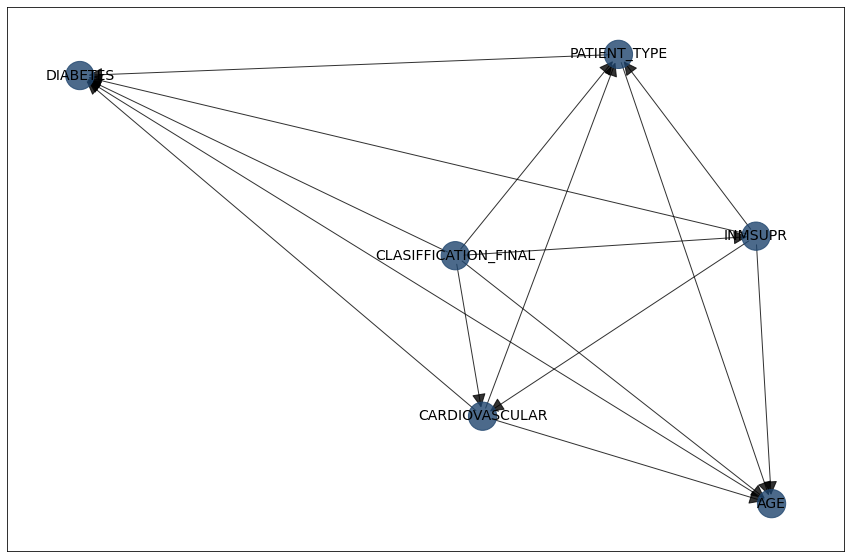

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


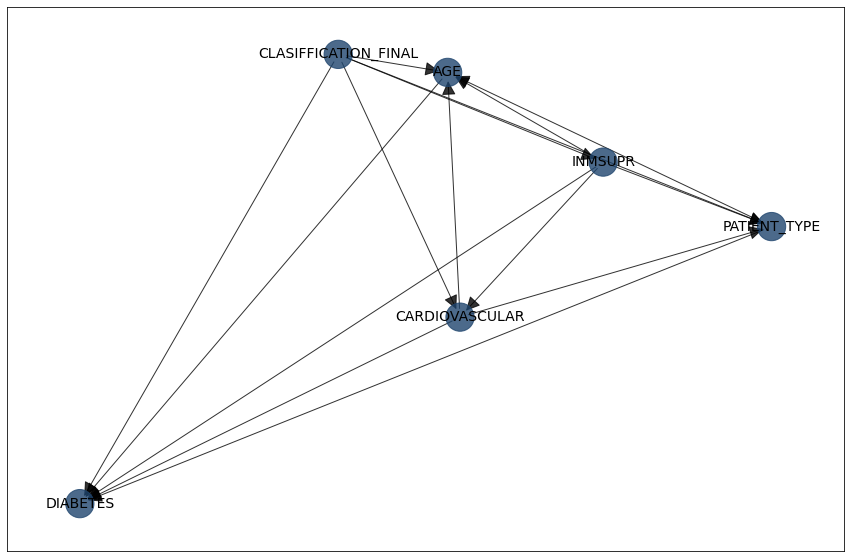

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


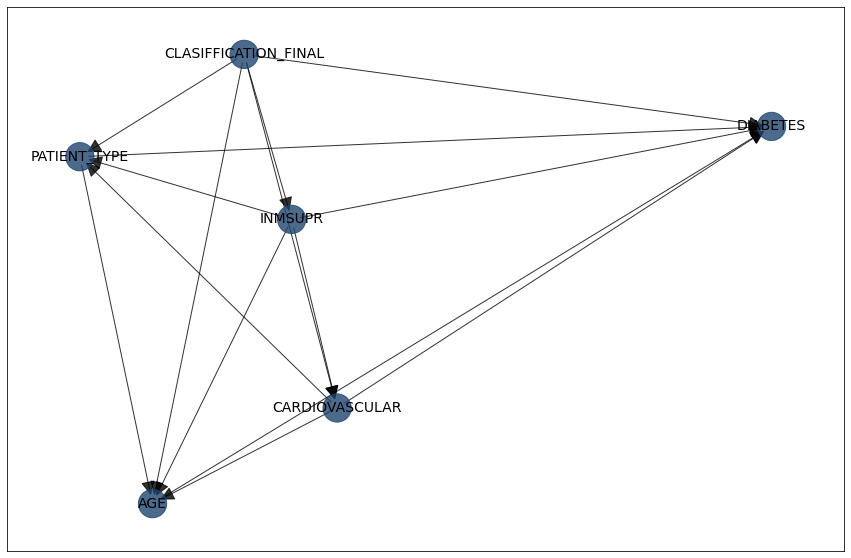

{'fig': <Figure size 1080x720 with 1 Axes>,
 'ax': <Figure size 1080x720 with 1 Axes>,
 'pos': {'DIABETES': array([1.        , 0.22662457]),
  'AGE': array([-0.34938342, -0.49583642]),
  'CARDIOVASCULAR': array([ 0.05295705, -0.31265445]),
  'CLASIFFICATION_FINAL': array([-0.14966828,  0.36466272]),
  'PATIENT_TYPE': array([-0.5078534 ,  0.16863117]),
  'INMSUPR': array([-0.04605196,  0.0485724 ])},
 'G': <networkx.classes.digraph.DiGraph at 0x7f3ef8147c70>,
 'node_properties': {'DIABETES': {'node_color': '#1f456e', 'node_size': 800},
  'AGE': {'node_color': '#1f456e', 'node_size': 800},
  'CARDIOVASCULAR': {'node_color': '#1f456e', 'node_size': 800},
  'CLASIFFICATION_FINAL': {'node_color': '#1f456e', 'node_size': 800},
  'PATIENT_TYPE': {'node_color': '#1f456e', 'node_size': 800},
  'INMSUPR': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('AGE', 'DIABETES'): {'color': '#000000', 'weight': 1},
  ('CARDIOVASCULAR', 'DIABETES'): {'color': '#000000', 'weight': 1},
 

In [49]:
bn.plot(model_cs_k2)
bn.plot(model_cs_bdeu)
bn.plot(model_cs_bic)

In [34]:
df_hos = data_1.drop(columns = ['CLASIFFICATION_FINAL', 'DIABETES'])

In [35]:
df_hos

,PATIENT_TYPE,AGE,INMSUPR,CARDIOVASCULAR
0,1,2,0,0
1,1,3,0,0
2,0,2,0,0
3,1,2,0,0
4,1,3,0,0
...,...,...,...,...
236521,1,2,0,0
236522,0,2,0,0
236523,0,2,0,0
236524,1,2,0,0


In [36]:
#Hill Climbing
model_hc_bic1   = bn.structure_learning.fit(df_hos, methodtype='hc', scoretype='bic')
model_hc_k21   = bn.structure_learning.fit(df_hos, methodtype='hc', scoretype='k2')
model_hc_bdeu1 = bn.structure_learning.fit(df_hos, methodtype='hc', scoretype='bdeu')

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


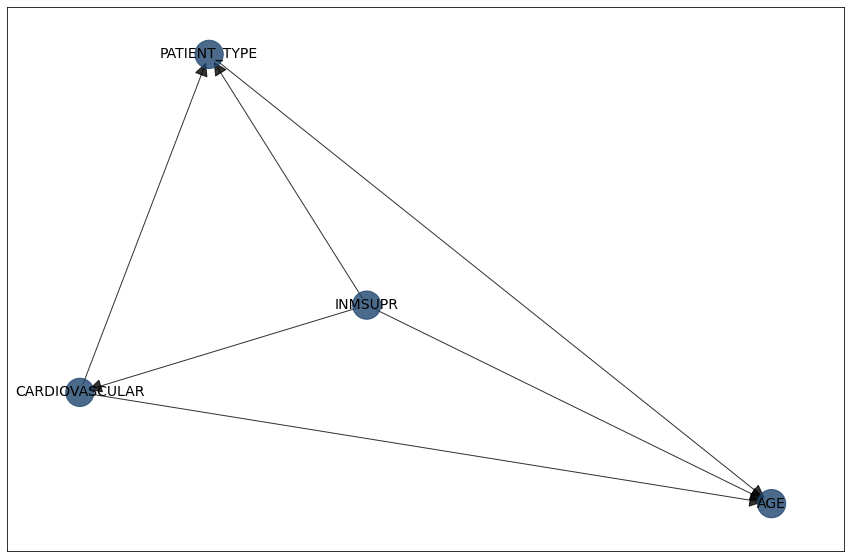

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


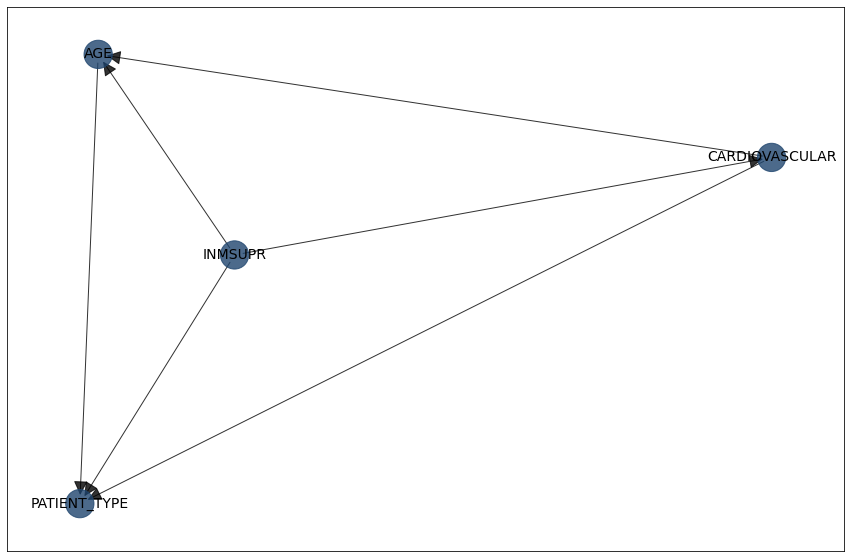

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


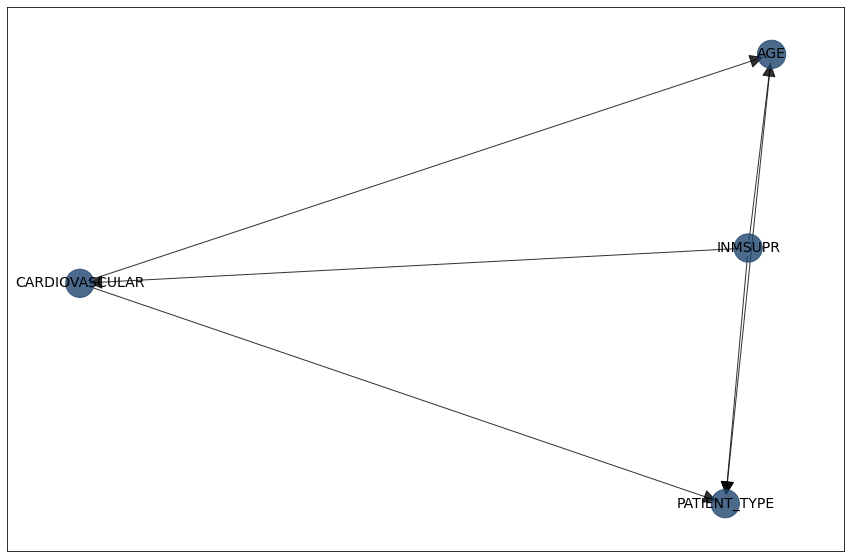

{'fig': <Figure size 1080x720 with 1 Axes>,
 'ax': <Figure size 1080x720 with 1 Axes>,
 'pos': {'PATIENT_TYPE': array([ 0.20588425, -1.        ]),
  'AGE': array([0.27211956, 0.94235152]),
  'INMSUPR': array([0.23868328, 0.10518143]),
  'CARDIOVASCULAR': array([-0.71668709, -0.04753295])},
 'G': <networkx.classes.digraph.DiGraph at 0x7f4f05a71940>,
 'node_properties': {'PATIENT_TYPE': {'node_color': '#1f456e',
   'node_size': 800},
  'AGE': {'node_color': '#1f456e', 'node_size': 800},
  'INMSUPR': {'node_color': '#1f456e', 'node_size': 800},
  'CARDIOVASCULAR': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('AGE', 'PATIENT_TYPE'): {'color': '#000000',
   'weight': 1},
  ('INMSUPR', 'PATIENT_TYPE'): {'color': '#000000', 'weight': 1},
  ('INMSUPR', 'AGE'): {'color': '#000000', 'weight': 1},
  ('INMSUPR', 'CARDIOVASCULAR'): {'color': '#000000', 'weight': 1},
  ('CARDIOVASCULAR', 'PATIENT_TYPE'): {'color': '#000000', 'weight': 1},
  ('CARDIOVASCULAR', 'AGE'): {'color':

In [37]:
bn.plot(model_hc_bic1)
bn.plot(model_hc_k21)
bn.plot(model_hc_bdeu1)

[bnlearn] >Computing best DAG using [cs]


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Warning: Structure scoring could not be computed. Method [cs] not supported.
[bnlearn] >Computing best DAG using [cs]


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Warning: Structure scoring could not be computed. Method [cs] not supported.
[bnlearn] >Computing best DAG using [cs]


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Warning: Structure scoring could not be computed. Method [cs] not supported.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


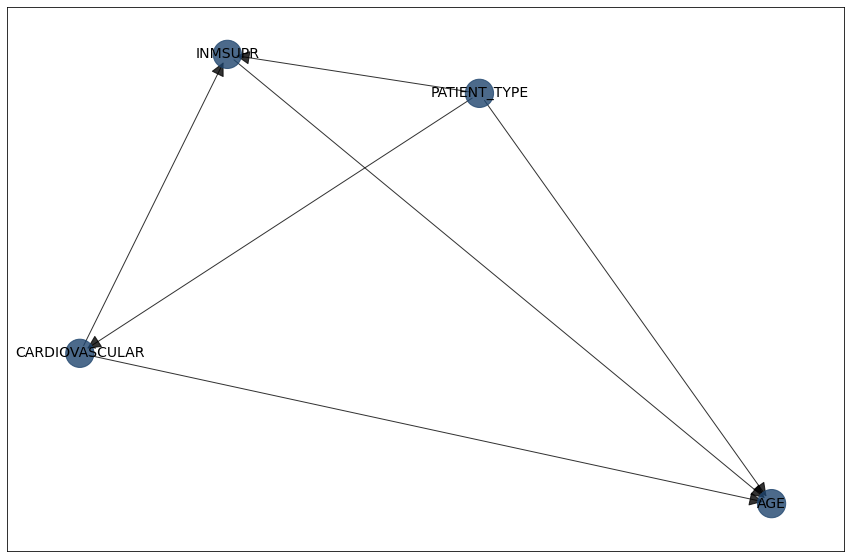

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


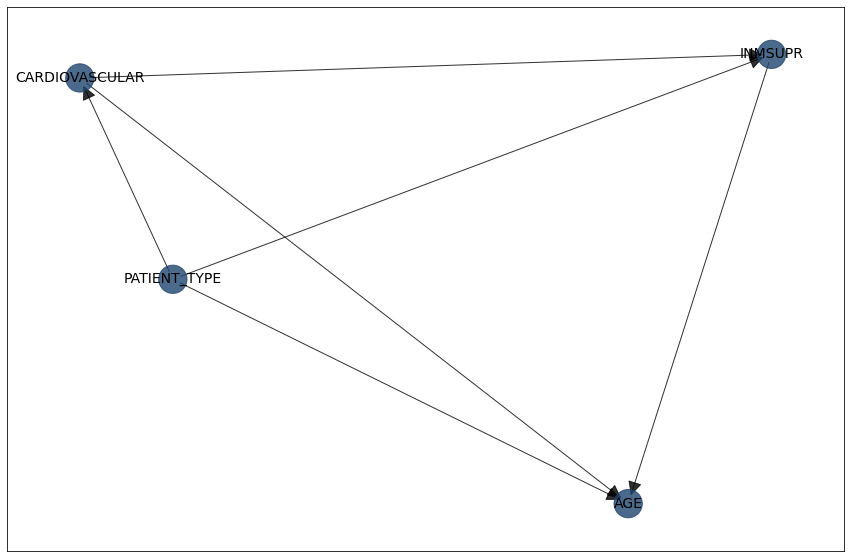

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


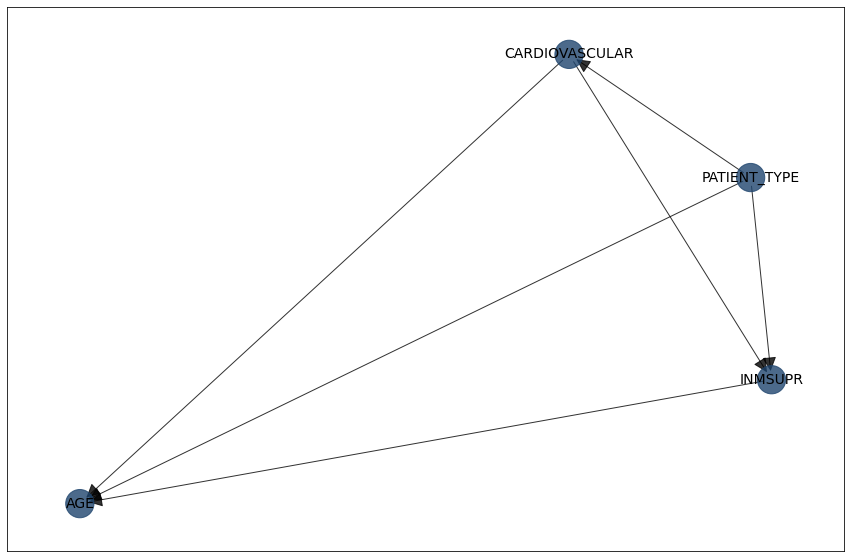

{'fig': <Figure size 1080x720 with 1 Axes>,
 'ax': <Figure size 1080x720 with 1 Axes>,
 'pos': {'AGE': array([-1.        , -0.76007366]),
  'INMSUPR': array([ 0.49425529, -0.34111864]),
  'CARDIOVASCULAR': array([0.056724  , 0.75882595]),
  'PATIENT_TYPE': array([0.44902072, 0.34236635])},
 'G': <networkx.classes.digraph.DiGraph at 0x7f4ef7937cd0>,
 'node_properties': {'AGE': {'node_color': '#1f456e', 'node_size': 800},
  'INMSUPR': {'node_color': '#1f456e', 'node_size': 800},
  'CARDIOVASCULAR': {'node_color': '#1f456e', 'node_size': 800},
  'PATIENT_TYPE': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('INMSUPR', 'AGE'): {'color': '#000000', 'weight': 1},
  ('CARDIOVASCULAR', 'AGE'): {'color': '#000000', 'weight': 1},
  ('CARDIOVASCULAR', 'INMSUPR'): {'color': '#000000', 'weight': 1},
  ('PATIENT_TYPE', 'AGE'): {'color': '#000000', 'weight': 1},
  ('PATIENT_TYPE', 'INMSUPR'): {'color': '#000000', 'weight': 1},
  ('PATIENT_TYPE', 'CARDIOVASCULAR'): {'color': '#000

In [38]:
#Constraint Search
model_cs_bic1   = bn.structure_learning.fit(df_hos, methodtype='cs', scoretype='bic')
model_cs_k21   = bn.structure_learning.fit(df_hos, methodtype='cs', scoretype='k2')
model_cs_bdeu1 = bn.structure_learning.fit(df_hos, methodtype='cs', scoretype='bdeu')
bn.plot(model_cs_bic1)
bn.plot(model_cs_k21)
bn.plot(model_cs_bdeu1)

[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


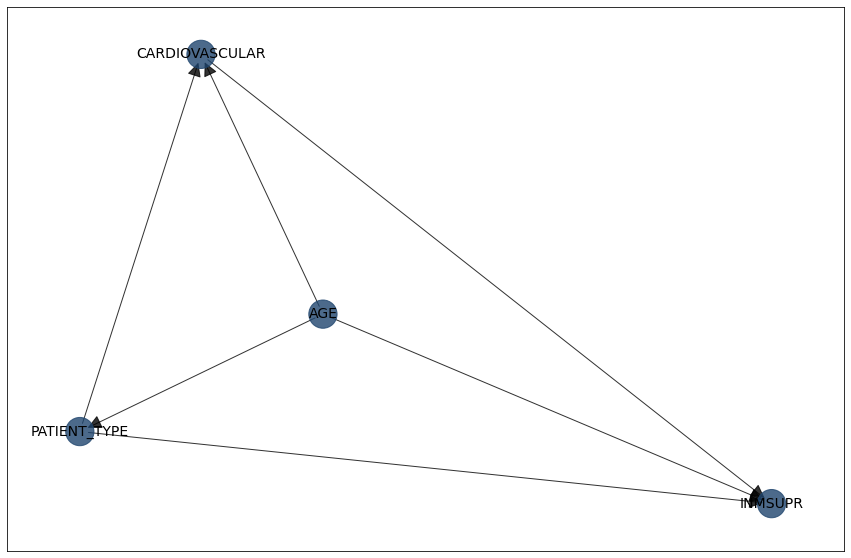

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


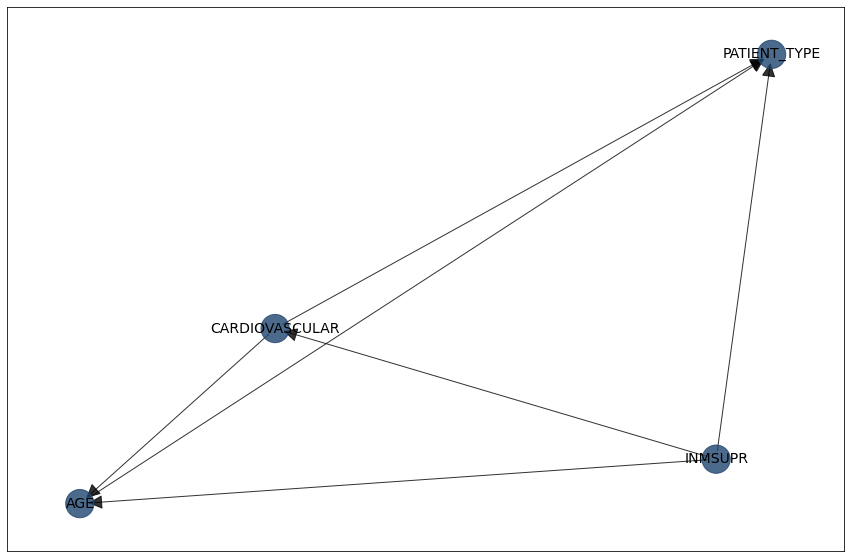

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


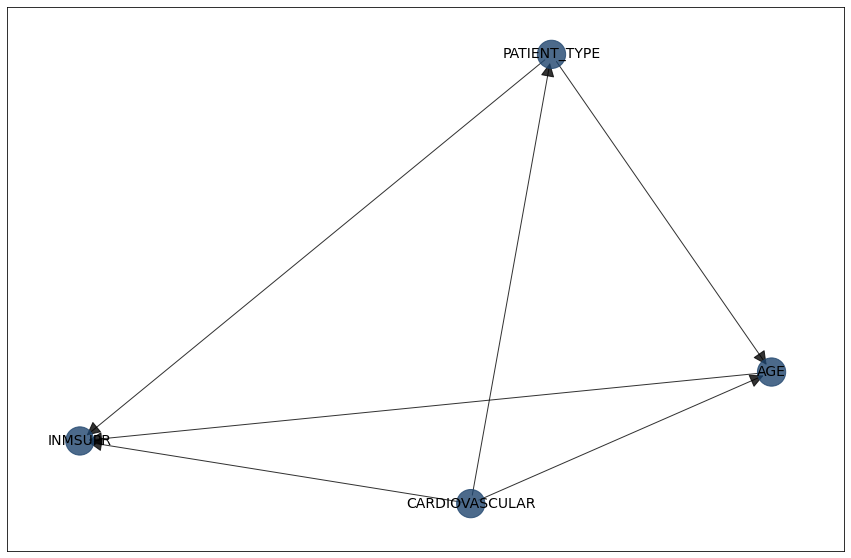

{'fig': <Figure size 1080x720 with 1 Axes>,
 'ax': <Figure size 1080x720 with 1 Axes>,
 'pos': {'AGE': array([ 0.78015928, -0.057642  ]),
  'CARDIOVASCULAR': array([ 0.00601643, -0.31667263]),
  'INMSUPR': array([-1.        , -0.19333123]),
  'PATIENT_TYPE': array([0.21382428, 0.56764586])},
 'G': <networkx.classes.digraph.DiGraph at 0x7f4ef5bde040>,
 'node_properties': {'AGE': {'node_color': '#1f456e', 'node_size': 800},
  'CARDIOVASCULAR': {'node_color': '#1f456e', 'node_size': 800},
  'INMSUPR': {'node_color': '#1f456e', 'node_size': 800},
  'PATIENT_TYPE': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('AGE', 'INMSUPR'): {'color': '#000000', 'weight': 1},
  ('CARDIOVASCULAR', 'AGE'): {'color': '#000000', 'weight': 1},
  ('CARDIOVASCULAR', 'INMSUPR'): {'color': '#000000', 'weight': 1},
  ('CARDIOVASCULAR', 'PATIENT_TYPE'): {'color': '#000000', 'weight': 1},
  ('PATIENT_TYPE', 'AGE'): {'color': '#000000', 'weight': 1},
  ('PATIENT_TYPE', 'INMSUPR'): {'color': '#0

In [40]:
#Exhaustive Search
model_ex_bic1  = bn.structure_learning.fit(df_hos, methodtype='ex', scoretype='bic')
model_ex_k21   = bn.structure_learning.fit(df_hos, methodtype='ex', scoretype='k2')
model_ex_bdeu1 = bn.structure_learning.fit(df_hos, methodtype='ex', scoretype='bdeu')
bn.plot(model_ex_bic1)
bn.plot(model_ex_k21)
bn.plot(model_ex_bdeu1)

In [47]:
models = [model_hc_bic1, model_hc_k21, model_hc_bdeu1, model_cs_bic1, model_cs_k21, model_cs_bdeu1, model_ex_bic1, model_ex_k21, model_ex_bdeu1]
struc_scores = []
for i, model in enumerate(models):
  print("Model {}".format(i+1))
  model_ = bn.parameter_learning.fit(model, df_hos) 
  bn.print_CPD(model_)
  struc_scores.append(bn.structure_scores(model, df_hos, scoring_method = 'bic'))

Model 1
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of PATIENT_TYPE:
+-----------------+-----+---------------------+
| CARDIOVASCULAR  | ... | CARDIOVASCULAR(1)   |
+-----------------+-----+---------------------+
| INMSUPR         | ... | INMSUPR(1)          |
+-----------------+-----+---------------------+
| PATIENT_TYPE(0) | ... | 0.5469973890339426  |
+-----------------+-----+---------------------+
| PATIENT_TYPE(1) | ... | 0.45300261096605743 |
+-----------------+-----+---------------------+
[bnlearn] >CPD of AGE:
+----------------+-----+---------------------+
| CARDIOVASCULAR | ... | CARDIOVASCULAR(1)   |
+----------------+-----+---------------------+
| INMSUPR        | ... | INMSUPR(1)          |
+----------------+-----+---------------------+
| PATIENT_TYPE   | ... | PATIENT_TYPE(1)     |
+----------------+-----+-----

In [48]:
struc_scores

[{'bic': -483565.90062282636},
 {'bic': -483565.90062282636},
 {'bic': -483565.90062282636},
 {},
 {},
 {},
 {'bic': -483565.9006228263},
 {'bic': -483565.9006228263},
 {'bic': -483565.9006228263}]

In [46]:
bn.print_CPD(model_)

[bnlearn] >Data is stored in [query.df]
+----+-------+------------------+----------------+-----------+
|    |   AGE |   CARDIOVASCULAR |   PATIENT_TYPE |         p |
+====+=======+==================+================+===========+
|  0 |     0 |                0 |              0 | 0.0183589 |
+----+-------+------------------+----------------+-----------+
|  1 |     0 |                0 |              1 | 0.0236386 |
+----+-------+------------------+----------------+-----------+
|  2 |     0 |                1 |              0 | 0.0299296 |
+----+-------+------------------+----------------+-----------+
|  3 |     0 |                1 |              1 | 0.0212318 |
+----+-------+------------------+----------------+-----------+
|  4 |     1 |                0 |              0 | 0.108409  |
+----+-------+------------------+----------------+-----------+
|  5 |     1 |                0 |              1 | 0.252302  |
+----+-------+------------------+----------------+-----------+
|  6 |     1 | 

{'AGE':     AGE  CARDIOVASCULAR  PATIENT_TYPE         p
 0     0               0             0  0.018359
 1     0               0             1  0.023639
 2     0               1             0  0.029930
 3     0               1             1  0.021232
 4     1               0             0  0.108409
 5     1               0             1  0.252302
 6     1               1             0  0.052337
 7     1               1             1  0.163900
 8     2               0             0  0.543538
 9     2               0             1  0.553808
 10    2               1             0  0.383536
 11    2               1             1  0.543907
 12    3               0             0  0.329694
 13    3               0             1  0.170252
 14    3               1             0  0.534198
 15    3               1             1  0.270961,
 'INMSUPR':     INMSUPR  AGE  CARDIOVASCULAR  PATIENT_TYPE         p
 0         0    0               0             0  0.813022
 1         0    0               